In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
from numpy.linalg import qr
from numpy.random import default_rng
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score
import random

[[ 0.    5.   30.   70.  ]
 [ 2.97  1.    0.9   0.58]]
6 6 6


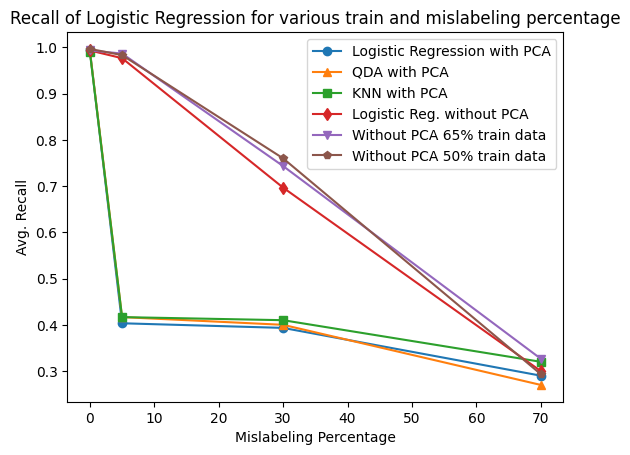

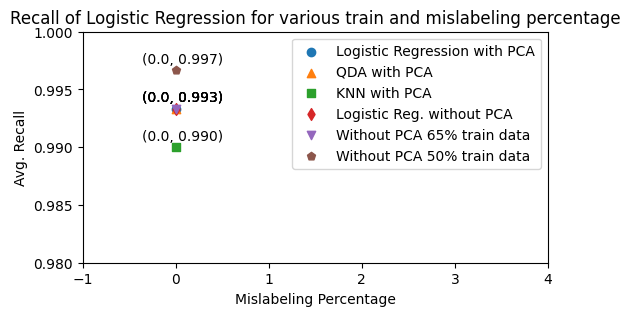

3 6 6


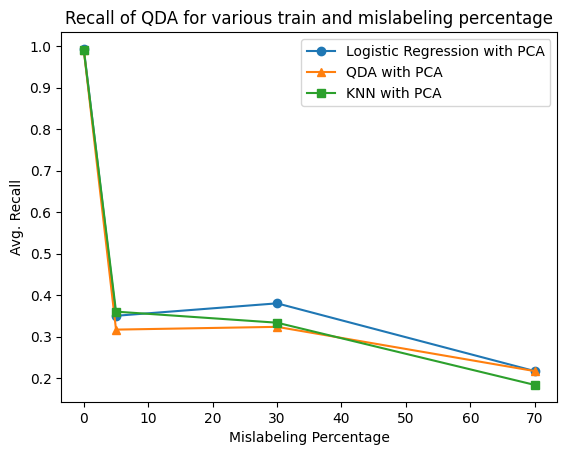

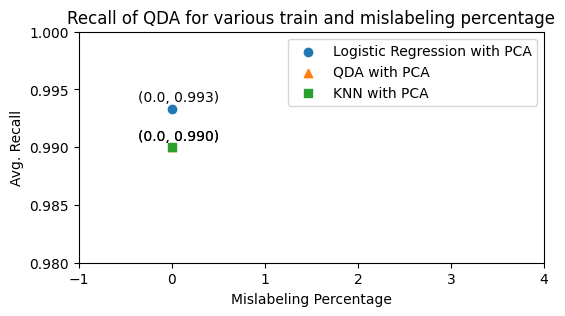

3 6 6


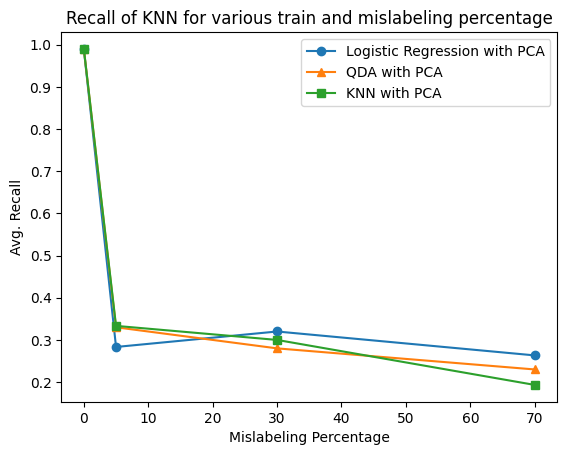

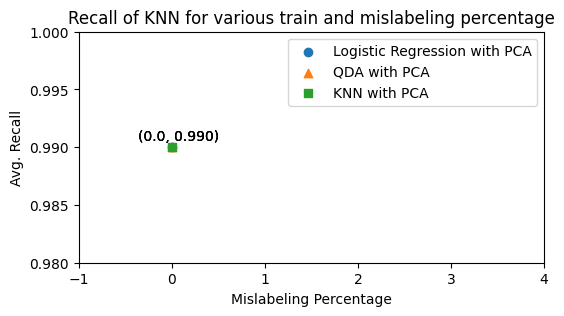

4 6 6


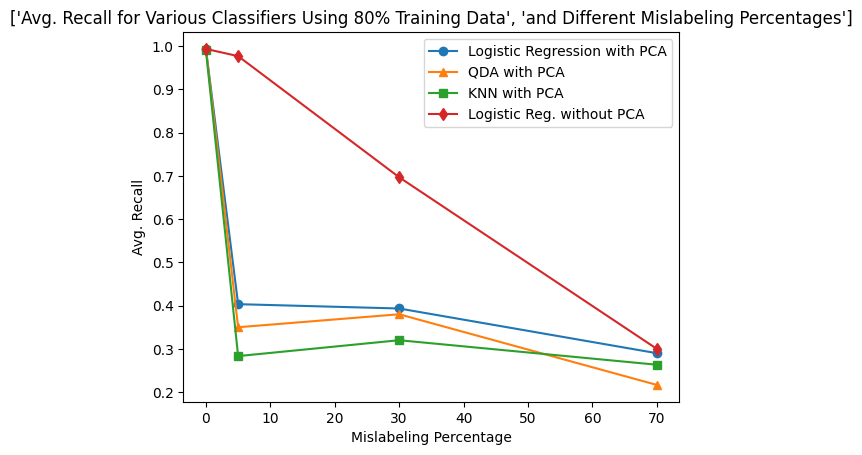

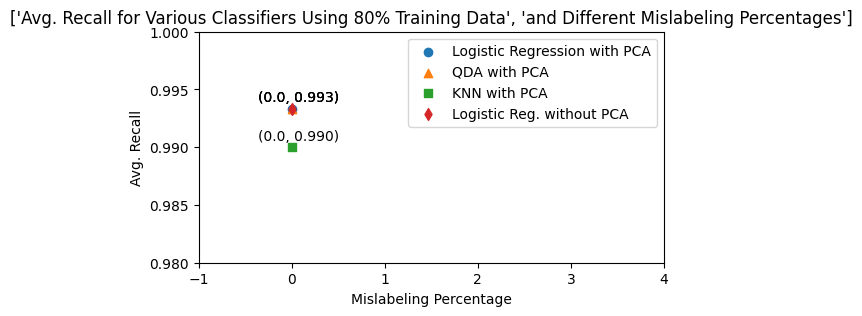

4 6 6


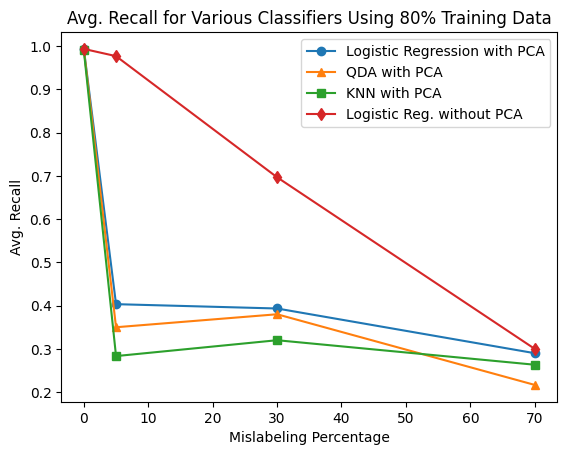

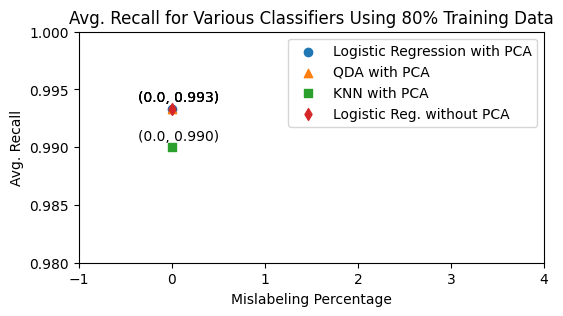

4 6 6


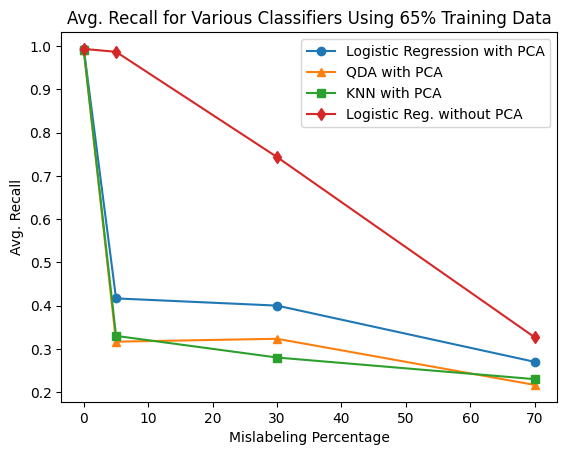

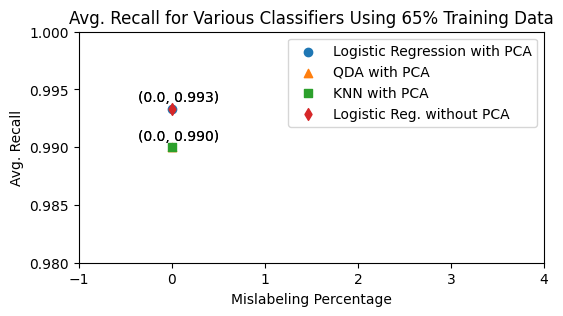

4 6 6


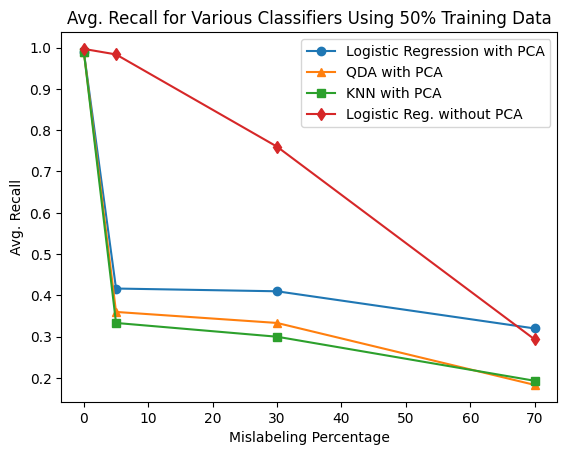

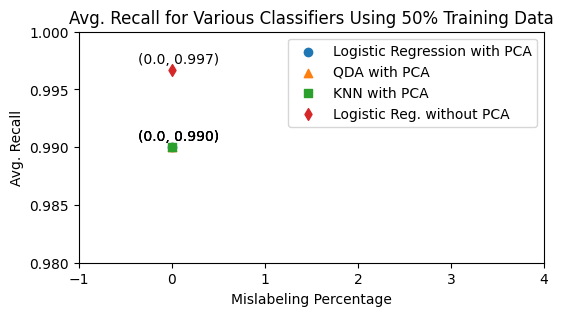

In [ ]:
def summary_plot(data, title1):
    labels=['Logistic Regression with PCA',
            'QDA with PCA',
            'KNN with PCA',
            'Logistic Reg. without PCA',
            'Without PCA 65% train data',
            'Without PCA 50% train data' ]

    markers = ['o', '^', 's', 'd', 'v', 'p']
    print(len(data),len(markers),len(labels))
    for i in range(len(data)):
        # data[i, 1, :] = data[i, 1, :] / 3
        copy_data = np.array(data)
        copy_data[i][1][:] = [x / 3 for x in data[i][1][:]]
        # plt.plot(data[i][0][1:],data[i][1][1:],label=labels[i], marker=markers[i])
        plt.plot(copy_data[i][0],copy_data[i][1],label=labels[i], marker=markers[i])

    plt.legend()
    plt.xlabel('Mislabeling Percentage')
    plt.ylabel('Avg. Recall')
    plt.title(title1)
    # plt.title('\n'.join(title1))
    plt.show()
    plt.figure(figsize=(6, 3))
    for i in range(len(data)):
        # data[i, 1, :] = data[i, 1, :] / 3
        copy_data = np.array(data)

        copy_data[i][1][:] = [x / 3 for x in data[i][1][:]]
        # plt.plot(data[i][0][1:],data[i][1][1:],label=labels[i], marker=markers[i])
        plt.scatter(copy_data[i][0],copy_data[i][1],label=labels[i], marker=markers[i])
        for x, y in zip(copy_data[i][0], copy_data[i][1]):
            plt.annotate(f'({x:.1f}, {y:.3f})', (x, y), textcoords="offset points", xytext=(5,5), ha='center')
    plt.legend()
    plt.xlabel('Mislabeling Percentage')
    plt.ylabel('Avg. Recall')
    plt.title(title1)
    # plt.title('\n'.join(title1))
    plt.ylim(0.98,1)
    plt.xlim(-1,4)
    plt.show()



"raw LogisticRegression"
logistic_80 =np.array([[0,5,30,70],[0.99+0.99+1,0.97+0.98+0.98,0.71+0.68+0.70,0.30+0.29+0.31]])
logistic_65 = np.array([[0,5,30,70],[0.99+1+0.99,0.99+0.99+0.98,0.74+0.75+0.74,0.29+0.3+0.39]])
logistic_50 =np.array([[0,5,30,70],[1+1+0.99,0.99+0.98+0.98,0.76+0.76+0.76,0.28+0.29+0.31]])

"PCA logistic"
logistic_PCA_80 = np.array([[0,5,30,70],[0.99+0.99+1,0.41+0.38+0.42,0.37+0.41+0.40,0.21+0.19+0.47]])
logistic_PCA_65 = np.array([[0,5,30,70],[0.99+0.99+1,0.42+0.4+0.43,0.42+0.4+0.38,0.27+0.28+0.26]])
logistic_PCA_50 =np.array([[0,5,30,70],[0.99+0.99+0.99,0.41+0.44+0.4,0.4+0.45+0.38,0.29+0.39+0.28]])

"PCA QDA"
QDA_PCA_80 = np.array([[0,5,30,70],[0.99+0.99+1,0.37+0.30+0.38,0.36+0.34+0.44,0.20+0.14+0.31]])
QDA_PCA_65 = np.array([[0,5,30,70],[0.99+0.99+0.99,0.37+0.26+0.32,0.38+0.31+0.28,0.23+0.23+0.19]])
QDA_PCA_50 = np.array([[0,5,30,70],[0.99+0.99+0.99,0.36+0.45+0.27,0.41+0.37+0.22,0.17+0.21+0.17]])

'PCA KNN'
KNN_PCA_80 = np.array([[0,5,30,70],[0.99+0.98+1,0.35+0.25+0.25,0.31+0.37+0.28,0.25+0.22+0.32]])
KNN_PCA_65 = np.array([[0,5,30,70],[0.99+0.99+0.99,0.36+0.27+0.36,0.31+0.29+0.24,0.26+0.2+0.23]])
KNN_PCA_50 = np.array([[0,5,30,70],[0.99+0.99+0.99,0.27+0.4+0.33,0.31+0.36+0.23,0.22+0.19+0.17]])
print(KNN_PCA_50)
#  {'knn__n_neighbors': 5, 'reduce_dims__n_components': 20}

summary_plot([logistic_PCA_80,logistic_PCA_65,logistic_PCA_50 ,logistic_80,logistic_65,logistic_50],'Recall of Logistic Regression for various train and mislabeling percentage')


#qda plot
summary_plot([QDA_PCA_80, QDA_PCA_65,QDA_PCA_50],'Recall of QDA for various train and mislabeling percentage')

#KNN plot

summary_plot([KNN_PCA_80, KNN_PCA_65, KNN_PCA_50],'Recall of KNN for various train and mislabeling percentage')
#80 train
summary_plot([logistic_PCA_80,QDA_PCA_80,KNN_PCA_80,logistic_80],
             ['Avg. Recall for Various Classifiers Using 80% Training Data',
              'and Different Mislabeling Percentages'])

summary_plot([logistic_PCA_80,QDA_PCA_80,KNN_PCA_80,logistic_80],
             'Avg. Recall for Various Classifiers Using 80% Training Data')
#65 train
summary_plot([logistic_PCA_65,QDA_PCA_65,KNN_PCA_65,logistic_65],
             'Avg. Recall for Various Classifiers Using 65% Training Data')
#50 train
summary_plot([logistic_PCA_50,QDA_PCA_50,KNN_PCA_50,logistic_50],
             'Avg. Recall for Various Classifiers Using 50% Training Data')


6 6 6


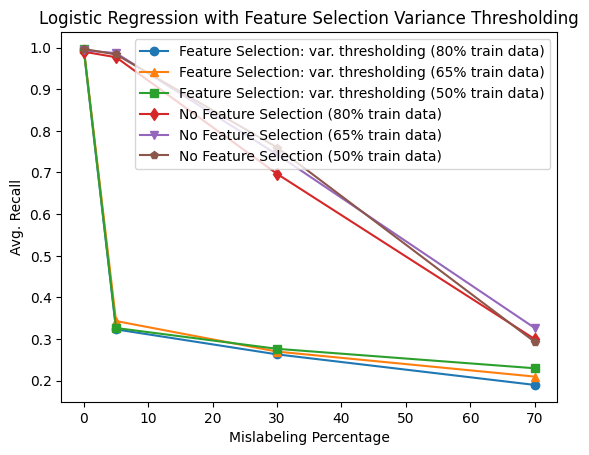

In [ ]:
def summary_plot_feature_sel(data, title1):
    labels=['Feature Selection: var. thresholding (80% train data)',
            'Feature Selection: var. thresholding (65% train data)',
            'Feature Selection: var. thresholding (50% train data)',
            'No Feature Selection (80% train data)',
            'No Feature Selection (65% train data)',
            'No Feature Selection (50% train data)' ]

    markers = ['o', '^', 's', 'd', 'v', 'p']
    print(len(data),len(markers),len(labels))
    for i in range(len(data)):
        data[i][1][:] = [x / 3 for x in data[i][1][:]]
        # plt.plot(data[i][0][1:],data[i][1][1:],label=labels[i], marker=markers[i])

        plt.plot(data[i][0],data[i][1],label=labels[i], marker=markers[i])

    plt.legend()
    plt.xlabel('Mislabeling Percentage')
    plt.ylabel('Avg. Recall')
    plt.title(title1)
    # plt.yscale('log')
    plt.show()

# summary_plot([[1,2],[1,5],[1,6]],[[5,2],[5,5],[5,6]],[[7,2],[7,5],[7,6]])


"raw LogisticRegression"
logistic_80 =np.array([[0,5,30,70],[0.99+0.99+0.99,0.97+0.98+0.98,0.71+0.68+0.70,0.30+0.29+0.31]])
logistic_65 = np.array([[0,5,30,70],[0.99+1+0.99,0.99+0.99+0.98,0.74+0.75+0.74,0.29+0.3+0.39]])
logistic_50 =np.array([[0,5,30,70],[1+1+0.99,0.99+0.98+0.98,0.76+0.76+0.76,0.28+0.29+0.31]])

logistic_max_variance_80 = np.array([[0,5,30,70],[0.99+0.99+1,0.33+0.38+0.26,0.21+0.23+0.35,0.16+0.17+0.24]])
logistic_max_variance_65 = np.array([[0,5,30,70],[1+1+0.99,0.28+0.41+0.34,0.21+0.4+0.2,0.2+0.2+0.23]])
logistic_max_variance_50 = np.array([[0,5,30,70],[1+1+0.99,0.42+0.25+0.31,0.32+0.24+0.27,0.3+0.19+0.2]])

summary_plot_feature_sel([logistic_max_variance_80,logistic_max_variance_65, logistic_max_variance_50, logistic_80, logistic_65, logistic_50], 'Logistic Regression with Feature Selection Variance Thresholding')


6 6 6


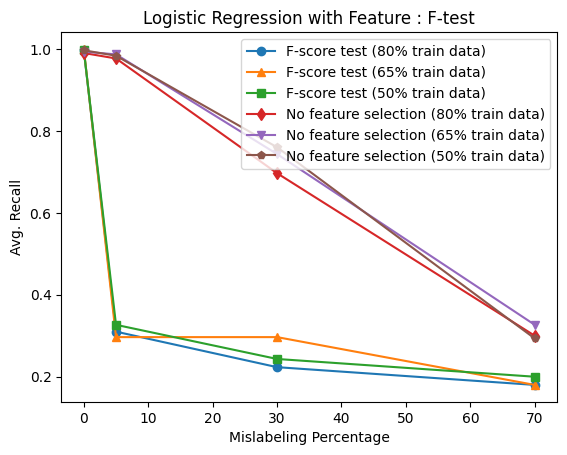

In [ ]:
def summary_plot_f_score(data, title1):
    labels=['F-score test (80% train data) ',
            'F-score test (65% train data)',
            'F-score test (50% train data)',
            'No feature selection (80% train data)',
            'No feature selection (65% train data)',
            'No feature selection (50% train data)' ]

    markers = ['o', '^', 's', 'd', 'v', 'p']
    print(len(data),len(markers),len(labels))
    for i in range(len(data)):
        data[i][1][:] = [x / 3 for x in data[i][1][:]]
        # plt.plot(data[i][0][1:],data[i][1][1:],label=labels[i], marker=markers[i])

        plt.plot(data[i][0],data[i][1],label=labels[i], marker=markers[i])

    plt.legend()
    plt.xlabel('Mislabeling Percentage')
    plt.ylabel('Avg. Recall')
    plt.title(title1)
    # plt.yscale('log')
    plt.show()


"raw LogisticRegression"
logistic_80 =np.array([[0,5,30,70],[0.99+0.99+0.99,0.97+0.98+0.98,0.71+0.68+0.70,0.30+0.29+0.31]])
logistic_65 = np.array([[0,5,30,70],[0.99+1+0.99,0.99+0.99+0.98,0.74+0.75+0.74,0.29+0.3+0.39]])
logistic_50 =np.array([[0,5,30,70],[1+1+0.99,0.99+0.98+0.98,0.76+0.76+0.76,0.28+0.29+0.31]])

logistic_f_score_80 = np.array([[0,5,30,70],[1+0.99+1,0.35+0.32+0.26,0.21+0.25+0.21,0.18+0.16+0.20]])
logistic_f_score_65 = np.array([[0,5,30,70],[1+1+1,0.34+0.26+0.29,0.27+0.34+0.28,0.18+0.17+0.19]])
logistic_f_score_50 = np.array([[0,5,30,70],[1+1+0.99,0.25+0.43+0.3,0.22+0.23+0.28,0.16+0.21+0.23]])

summary_plot_f_score([logistic_f_score_80,logistic_f_score_65, logistic_f_score_50, logistic_80, logistic_65, logistic_50], 'Logistic Regression with Feature : F-test')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def summary_plot_feature_sel(data, title1):
    labels = [
        'Feature Selection: var. thresholding (80% train data)',
        'Feature Selection: var. thresholding (65% train data)',
        'Feature Selection: var. thresholding (50% train data)',
        'No Feature Selection (80% train data)',
        'No Feature Selection (65% train data)',
        'No Feature Selection (50% train data)'
    ]

    markers = ['o', '^', 's', 'd', 'v', 'p']
    line_styles = ['-', '-', '-', '--', '--', '--']  # Solid lines for feature selection, dashed for no feature selection
    print(f"Data sets: {len(data)}, Markers: {len(markers)}, Labels: {len(labels)}")

    # Plotting
    plt.figure(figsize=(10, 6))
    for i in range(len(data)):
        # Normalize y-values by dividing by 3 since data was summed
        normalized_y = [x / 3 for x in data[i][1]]
        plt.plot(data[i][0], normalized_y, label=labels[i], marker=markers[i], linestyle=line_styles[i])

    plt.legend()
    plt.xlabel('Mislabeling Percentage')
    plt.ylabel('Avg. Recall')
    plt.title(title1)
    plt.show()

# Example data
logistic_80 = np.array([[0, 5, 30, 70], [0.99 + 0.99 + 0.99, 0.97 + 0.98 + 0.98, 0.71 + 0.68 + 0.70, 0.30 + 0.29 + 0.31]])
logistic_65 = np.array([[0, 5, 30, 70], [0.99 + 1 + 0.99, 0.99 + 0.99 + 0.98, 0.74 + 0.75 + 0.74, 0.29 + 0.30 + 0.39]])
logistic_50 = np.array([[0, 5, 30, 70], [1 + 1 + 0.99, 0.99 + 0.98 + 0.98, 0.76 + 0.76 + 0.76, 0.28 + 0.29 + 0.31]])

logistic_max_variance_80 = np.array([[0, 5, 30, 70], [0.99 + 0.99 + 1, 0.33 + 0.38 + 0.26, 0.21 + 0.23 + 0.35, 0.16 + 0.17 + 0.24]])
logistic_max_variance_65 = np.array([[0, 5, 30, 70], [1 + 1 + 0.99, 0.28 + 0.41 + 0.34, 0.21 + 0.40 + 0.20, 0.20 + 0.20 + 0.23]])
logistic_max_variance_50 = np.array([[0, 5, 30, 70], [1 + 1 + 0.99, 0.42 + 0.25 + 0.31, 0.32 + 0.24 + 0.27, 0.30 + 0.19 + 0.20]])

# Using the function with the provided data
summary_plot_feature_sel([logistic_max_variance_80, logistic_max_variance_65, logistic_max_variance_50, logistic_80, logistic_65, logistic_50], 'Logistic Regression with and without Feature Selection')


In [ ]:
# logistic_80 =np.array([[0,5,30,70],[0.99,0.97,0.71,0.30]])
# logistic_max_variance_80 = np.array([[0,5,30,70],[0.99,0.41,0.37,0.21]])
# logistic_65 = np.array([[0,5,30,70],[0.99,0.99,0.74,0.29]])
# logistic_PCA_65 = np.array([[0,5,30,70],[0.99,0.42,0.42,0.27]])
# logistic_50 =np.array([[0,5,30,70],[1,0.99,0.76,0.28]])
# logistic_PCA_50 =np.array([[0,5,30,70],[0.99,0.41,0.40,0.29]])




In [ ]:
def summary_plot_feature_sel(data, title1):
    labels = [
        'Feature Selection: var. thresholding (80% train data)',
        'Feature Selection: var. thresholding (65% train data)',
        'Feature Selection: var. thresholding (50% train data)',
        'No Feature Selection (80% train data)',
        'No Feature Selection (65% train data)',
        'No Feature Selection (50% train data)'
    ]

    # Define color and line style based on training data percentage
    colors = {80: 'blue', 65: 'green', 50: 'red'}
    line_styles = {80: '-', 65: '-', 50: '-'}  # Default line style for feature selection
    no_feature_style = '--'  # Line style for no feature selection

    plt.figure(figsize=(10, 6))
    for i, label in enumerate(labels):
        # Normalize y-values by dividing by 3 since data was summed
        normalized_y = [x / 3 for x in data[i][1]]
        # Extract training percentage from label to determine color and line style
        train_percent = int(label.split('(')[-1][:2])
        color = colors[train_percent]
        line_style = no_feature_style if 'No Feature Selection' in label else line_styles[train_percent]

        plt.plot(data[i][0], normalized_y, label=label, linestyle=line_style, color=color, marker='o')

    plt.legend()
    plt.xlabel('(%)Mislabeling Percentage')
    plt.ylabel('Avg. Recall')
    plt.title(title1)
    plt.show()

# data
logistic_80 =np.array([[0,5,30,70],[0.99+0.99+0.99,0.97+0.98+0.98,0.71+0.68+0.70,0.30+0.29+0.31]])
logistic_65 = np.array([[0,5,30,70],[0.99+1+0.99,0.99+0.99+0.98,0.74+0.75+0.74,0.29+0.3+0.39]])
logistic_50 =np.array([[0,5,30,70],[1+1+0.99,0.99+0.98+0.98,0.76+0.76+0.76,0.28+0.29+0.31]])

logistic_max_variance_80 = np.array([[0,5,30,70],[0.99+0.99+1,0.33+0.38+0.26,0.21+0.23+0.35,0.16+0.17+0.24]])
logistic_max_variance_65 = np.array([[0,5,30,70],[1+1+0.99,0.28+0.41+0.34,0.21+0.4+0.2,0.2+0.2+0.23]])
logistic_max_variance_50 = np.array([[0,5,30,70],[1+1+0.99,0.42+0.25+0.31,0.32+0.24+0.27,0.3+0.19+0.2]])

# Using the function with the provided data
summary_plot_feature_sel([logistic_max_variance_80, logistic_max_variance_65, logistic_max_variance_50, logistic_80, logistic_65, logistic_50], 'Logistic Regression with Feature Selection Variance Thresholding')

In [ ]:
"raw LogisticRegression"
logistic_80 =np.array([[0,5,30,70],[0.99+0.99+0.99,0.97+0.98+0.98,0.71+0.68+0.70,0.30+0.29+0.31]])
logistic_65 = np.array([[0,5,30,70],[0.99+1+0.99,0.99+0.99+0.98,0.74+0.75+0.74,0.29+0.3+0.39]])
logistic_50 =np.array([[0,5,30,70],[1+1+0.99,0.99+0.98+0.98,0.76+0.76+0.76,0.28+0.29+0.31]])

logistic_f_score_80 = np.array([[0,5,30,70],[1+0.99+1,0.35+0.32+0.26,0.21+0.25+0.21,0.18+0.16+0.20]])
logistic_f_score_65 = np.array([[0,5,30,70],[1+1+1,0.34+0.26+0.29,0.27+0.34+0.28,0.18+0.17+0.19]])
logistic_f_score_50 = np.array([[0,5,30,70],[1+1+0.99,0.25+0.43+0.3,0.22+0.23+0.28,0.16+0.21+0.23]])

summary_plot_feature_sel([logistic_f_score_80,logistic_f_score_65, logistic_f_score_50, logistic_80, logistic_65, logistic_50], 'Logistic Regression with Feature : F-test')